## Escolher a doença

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor


In [578]:
#rodri
# diagnoses = pd.read_csv('C:/Users/rodri/Downloads/DIAGNOSES_ICD.csv')
# d_icd = pd.read_csv('C:/Users/rodri/Downloads/D_ICD_DIAGNOSES.csv')
# chart_events = pd.read_csv('C:/Users/rodri/Downloads/chart_events_filtered.csv')
# lab_events = pd.read_csv('C:/Users/rodri/Downloads/lab_events_filtered.csv')
# admissions = pd.read_csv('C:/Users/rodri/Downloads/admissions_filtered.csv')
# icustays = pd.read_csv('C:/Users/rodri/Downloads/icustays_filtered.csv')
# inputevents_mv = pd.read_csv('C:/Users/rodri/Downloads/inputevents_mv_filtered.csv')
# inputevents_cv = pd.read_csv('C:/Users/rodri/Downloads/inputevents_cv_filtered.csv')
# patients = pd.read_csv('C:/Users/rodri/Downloads/patients_filtered.csv')
# items = pd.read_csv('C:/Users/rodri/Downloads/D_ITEMS.csv')
# labitems = pd.read_csv('C:/Users/rodri/Downloads/D_LABITEMS.csv')

#babs
# diagnoses = pd.read_csv('DIAGNOSES_ICD.csv')
# d_icd = pd.read_csv('D_ICD_DIAGNOSES.csv')
# chart_events = pd.read_csv('chart_events_filtered.csv')
# lab_events = pd.read_csv('lab_events_filtered.csv')
# admissions = pd.read_csv('admissions_filtered.csv')
# icustays = pd.read_csv('icustays_filtered.csv')
# inputevents_mv = pd.read_csv('inputevents_mv_filtered.csv')
# inputevents_cv = pd.read_csv('inputevents_cv_filtered.csv')
# patients = pd.read_csv('patients_filtered.csv')
# items = pd.read_csv('D_ITEMS.csv')
# labitems = pd.read_csv('D_LABITEMS.csv')

In [579]:
diagnoses_primary = diagnoses[diagnoses['SEQ_NUM'] == 1]

icd9_counts_primary = diagnoses_primary['ICD9_CODE'].value_counts()

icd9_counts_filtered = icd9_counts_primary[(icd9_counts_primary >= 400) & (icd9_counts_primary <= 800)]

print(icd9_counts_filtered)


ICD9_CODE
486      725
5070     659
4280     570
4240     568
430      529
5849     526
41041    482
41011    482
5789     446
Name: count, dtype: int64


In [580]:
#codigo da doença escolhida é 486
diagnoses_inf = diagnoses[diagnoses['ICD9_CODE'] == '486']

disease_info = d_icd[d_icd['ICD9_CODE'] == '486']  
print(disease_info[['ICD9_CODE', 'SHORT_TITLE', 'LONG_TITLE']])

count_seq1 = diagnoses_inf[diagnoses_inf['SEQ_NUM'] == 1].shape[0]
print(count_seq1)

     ICD9_CODE              SHORT_TITLE                       LONG_TITLE
5147       486  Pneumonia, organism NOS  Pneumonia, organism unspecified
725


Criar tabela com outras duas colunas da segnda e terceira doença

In [581]:
diagnoses_inf = diagnoses[(diagnoses['ICD9_CODE'] == '486') & (diagnoses['SEQ_NUM'] == 1)]

diagnoses_seq2 = diagnoses[diagnoses['SEQ_NUM'] == 2][['SUBJECT_ID', 'HADM_ID', 'ICD9_CODE']].rename(columns={'ICD9_CODE': 'ICD9_CODE_2'})
diagnoses_seq3 = diagnoses[diagnoses['SEQ_NUM'] == 3][['SUBJECT_ID', 'HADM_ID', 'ICD9_CODE']].rename(columns={'ICD9_CODE': 'ICD9_CODE_3'})

merged = diagnoses_inf.merge(diagnoses_seq2, on=['SUBJECT_ID', 'HADM_ID'], how='left')
merged = merged.merge(diagnoses_seq3, on=['SUBJECT_ID', 'HADM_ID'], how='left')

tabela = merged[['SUBJECT_ID', 'HADM_ID', 'ICD9_CODE', 'ICD9_CODE_2', 'ICD9_CODE_3']]

print(tabela)
#aqui talvez fazer uma analise desta tabela, sobre o ICD9_CODE_2 e ICD9_CODE_3

     SUBJECT_ID  HADM_ID ICD9_CODE ICD9_CODE_2 ICD9_CODE_3
0           111   192123       486       49121        4139
1           242   192980       486         496       51889
2           346   195392       486       42731        4241
3           368   105889       486       49121       41071
4           370   123421       486       20410         496
..          ...      ...       ...         ...         ...
720       96244   186668       486       34831        5849
721       95895   145111       486       51881        2762
722       95895   179838       486       51884       49121
723       99937   129380       486        1120         515
724       96004   141589       486       51881        1623

[725 rows x 5 columns]


In [582]:
hadm_ids = tabela['HADM_ID'].unique()
subject_ids = tabela['SUBJECT_ID'].unique()

chart_events_filtered = chart_events[chart_events['HADM_ID'].isin(hadm_ids)]
lab_events_filtered = lab_events[lab_events['HADM_ID'].isin(hadm_ids)]
admissions_filtered = admissions[admissions['HADM_ID'].isin(hadm_ids)]
icustays_filtered = icustays[icustays['HADM_ID'].isin(hadm_ids)]
inputevents_mv_filtered = inputevents_mv[inputevents_mv['HADM_ID'].isin(hadm_ids)]
inputevents_cv_filtered = inputevents_cv[inputevents_cv['HADM_ID'].isin(hadm_ids)]
patients_filtered = patients[patients['SUBJECT_ID'].isin(subject_ids)]


chart_events_filtered.to_csv('chart_events_filtered.csv', index=False)
lab_events_filtered.to_csv('lab_events_filtered.csv', index=False)
admissions_filtered.to_csv('admissions_filtered.csv', index=False)
icustays_filtered.to_csv('icustays_filtered.csv', index=False)
inputevents_mv_filtered.to_csv('inputevents_mv_filtered.csv', index=False)
inputevents_cv_filtered.to_csv('inputevents_cv_filtered.csv', index=False)
patients_filtered.to_csv('patients_filtered.csv', index=False)


In [583]:
#download das tabelas filtradas, usar sempre a partir daqui
chart_events = pd.read_csv('C:/Users/rodri/OneDrive/Ambiente de Trabalho/Matemática Rodrigo/Mestrado/2ºsemestre/ML/Projeto2/chart_events_filtered.csv')
lab_events = pd.read_csv('C:/Users/rodri/OneDrive/Ambiente de Trabalho/Matemática Rodrigo/Mestrado/2ºsemestre/ML/Projeto2/lab_events_filtered.csv')
admissions = pd.read_csv('C:/Users/rodri/OneDrive/Ambiente de Trabalho/Matemática Rodrigo/Mestrado/2ºsemestre/ML/Projeto2/admissions_filtered.csv')
icustays = pd.read_csv('C:/Users/rodri/OneDrive/Ambiente de Trabalho/Matemática Rodrigo/Mestrado/2ºsemestre/ML/Projeto2/icustays_filtered.csv')
inputevents_cv = pd.read_csv('C:/Users/rodri/OneDrive/Ambiente de Trabalho/Matemática Rodrigo/Mestrado/2ºsemestre/ML/Projeto2/inputevents_cv_filtered.csv')
inputevents_mv = pd.read_csv('C:/Users/rodri/OneDrive/Ambiente de Trabalho/Matemática Rodrigo/Mestrado/2ºsemestre/ML/Projeto2/inputevents_mv_filtered.csv')
items = pd.read_csv('C:/Users/rodri/Downloads/D_ITEMS.csv')
labitems = pd.read_csv('C:/Users/rodri/Downloads/D_LABITEMS.csv')
patients = pd.read_csv('C:/Users/rodri/OneDrive/Ambiente de Trabalho/Matemática Rodrigo/Mestrado/2ºsemestre/ML/Projeto2/patients_filtered.csv')
diagnoses = pd.read_csv('C:/Users/rodri/Downloads/DIAGNOSES_ICD.csv')
d_icd = pd.read_csv('C:/Users/rodri/Downloads/D_ICD_DIAGNOSES.csv')

C:\Users\rodri\AppData\Local\Temp\ipykernel_9836\1816303104.py:2: DtypeWarning: Columns (8,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  chart_events = pd.read_csv('C:/Users/rodri/OneDrive/Ambiente de Trabalho/Matemática Rodrigo/Mestrado/2ºsemestre/ML/Projeto2/chart_events_filtered.csv')
C:\Users\rodri\AppData\Local\Temp\ipykernel_9836\1816303104.py:6: DtypeWarning: Columns (9,17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  inputevents_cv = pd.read_csv('C:/Users/rodri/OneDrive/Ambiente de Trabalho/Matemática Rodrigo/Mestrado/2ºsemestre/ML/Projeto2/inputevents_cv_filtered.csv')


## Análise geral da doença

### Icustays

=== STATISTICAL SUMMARY ===
Total ICU admissions: 763
Intensive care units represented: 5

Length of Stay distribution (days):
count    763.000000
mean       3.861453
std        4.755012
min        0.027951
25%        1.211753
50%        2.141609
75%        4.270422
max       41.557639
Name: LOS, dtype: float64


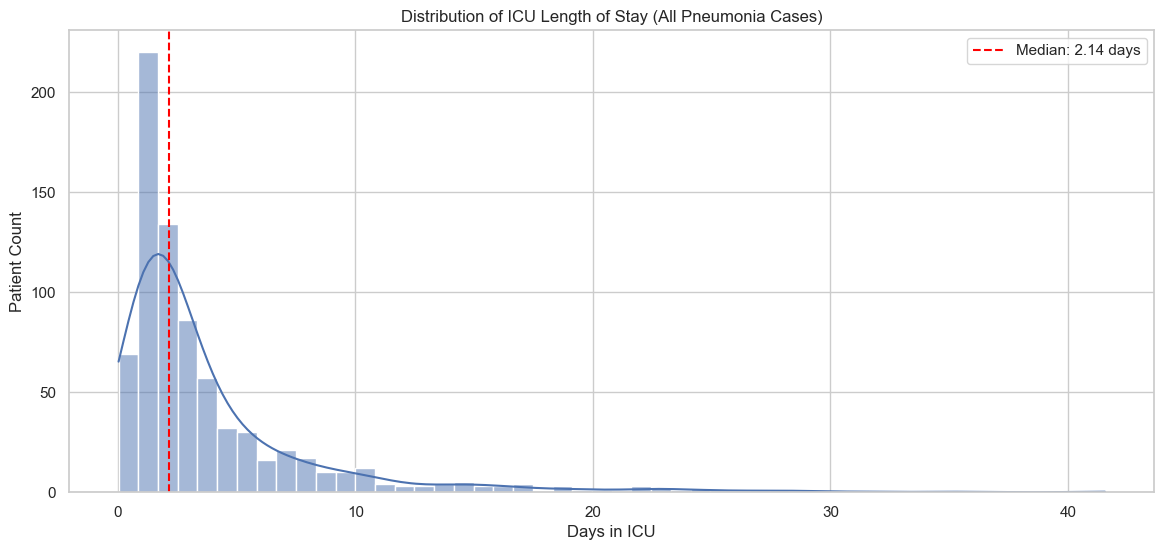

In [584]:
#icustays
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

icustays['INTIME'] = pd.to_datetime(icustays['INTIME'])
icustays['OUTTIME'] = pd.to_datetime(icustays['OUTTIME'])
icustays['LOS'] = (icustays['OUTTIME'] - icustays['INTIME']).dt.total_seconds() / 3600 / 24  # in days

# Basic Descriptive Analysis
print("=== STATISTICAL SUMMARY ===")
print(f"Total ICU admissions: {len(icustays)}")
print(f"Intensive care units represented: {icustays['LAST_CAREUNIT'].nunique()}")
print("\nLength of Stay distribution (days):")
print(icustays['LOS'].describe())

# LOS Distribution Visualization
plt.figure(figsize=(14, 6))
sns.histplot(data=icustays, x='LOS', bins=50, kde=True)
plt.title('Distribution of ICU Length of Stay (All Pneumonia Cases)')
plt.xlabel('Days in ICU')
plt.ylabel('Patient Count')
plt.axvline(x=icustays['LOS'].median(), color='red', linestyle='--', label=f'Median: {icustays["LOS"].median():.2f} days')
plt.legend()
plt.show()

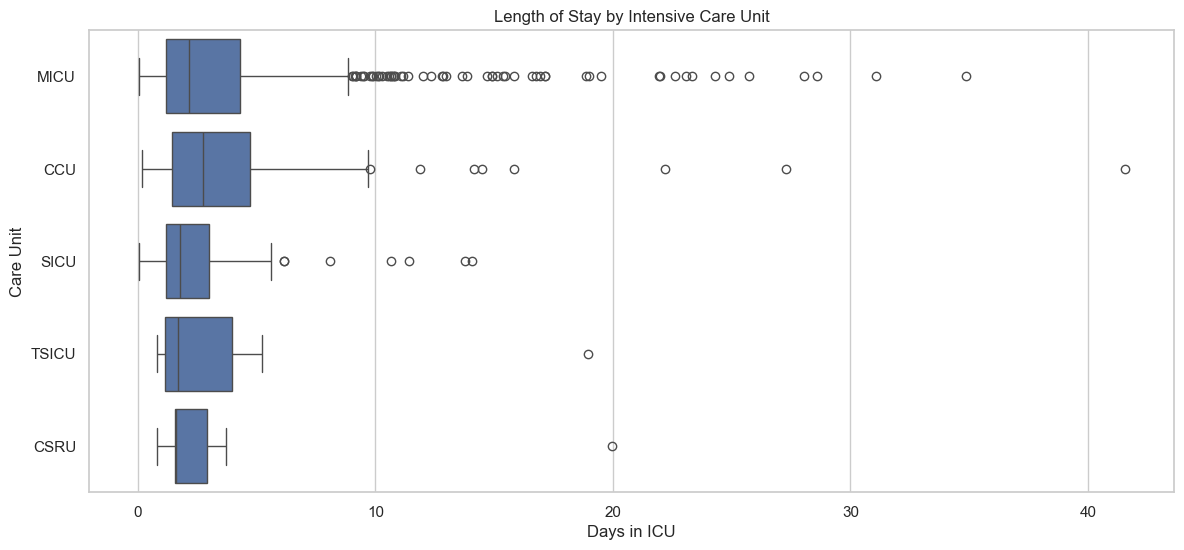

In [585]:
# Analysis by Care Unit
plt.figure(figsize=(14, 6))
sns.boxplot(data=icustays, x='LOS', y='LAST_CAREUNIT', order=icustays['LAST_CAREUNIT'].value_counts().index)
plt.title('Length of Stay by Intensive Care Unit')
plt.xlabel('Days in ICU')
plt.ylabel('Care Unit')
plt.show()

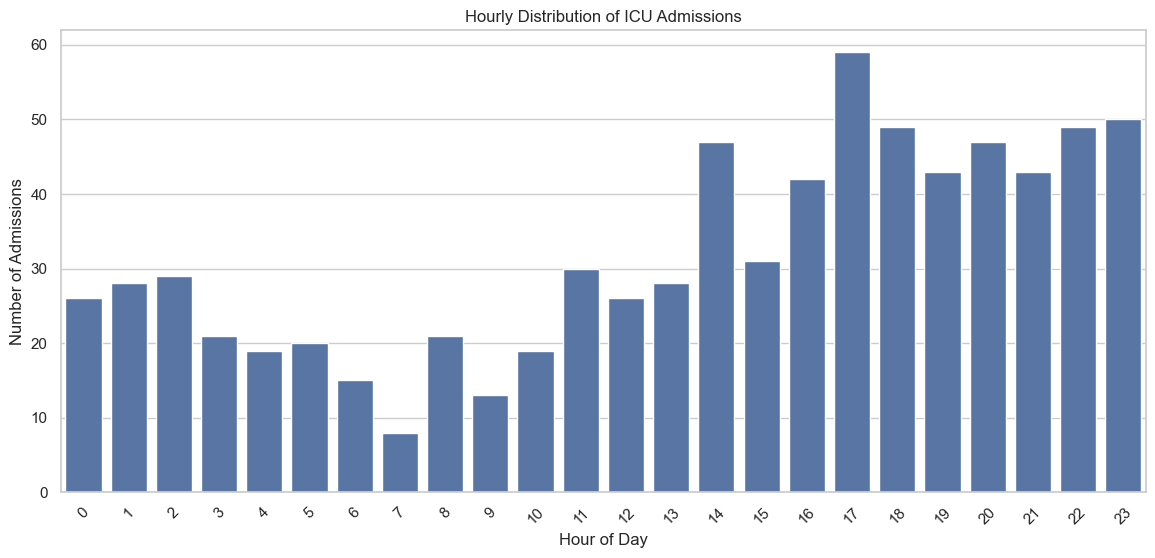

In [586]:
# Temporal Pattern of Admissions
icustays['ADMIT_HOUR'] = icustays['INTIME'].dt.hour
plt.figure(figsize=(14, 6))
sns.countplot(data=icustays, x='ADMIT_HOUR')
plt.title('Hourly Distribution of ICU Admissions')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.show()

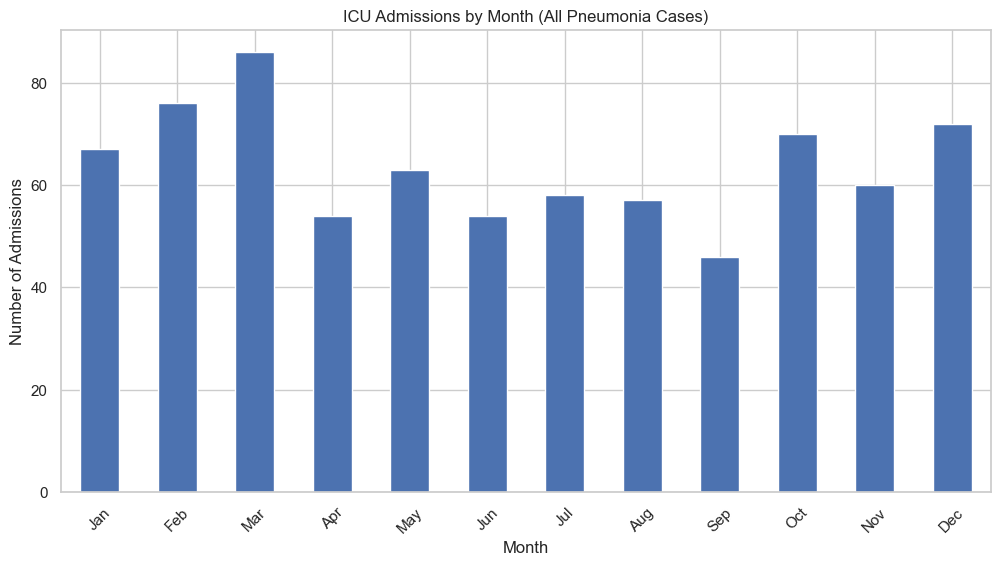

In [587]:
# Seasonality Analysis
icustays['ADMIT_MONTH'] = icustays['INTIME'].dt.month
monthly_admits = icustays['ADMIT_MONTH'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_admits.plot(kind='bar')
plt.title('ICU Admissions by Month (All Pneumonia Cases)')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

### Input events

=== INPUT EVENTS ANALYSIS ===
Total medication administrations: 191,503
Unique medication items: 273

Top 10 most administered items:
   ITEMID              LABEL  COUNT
0   30018  .9% Normal Saline  32897
1   30013                D5W  18745
2   30118           Fentanyl  13526
3   30124          Midazolam   8594
4   30131           Propofol   7534
5   30045            Insulin   6872
6  225158          NaCl 0.9%   6084
7  220949        Dextrose 5%   5303
8   30025            Heparin   4933
9   30141             Ativan   4927


C:\Users\rodri\AppData\Local\Temp\ipykernel_9836\1841494319.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


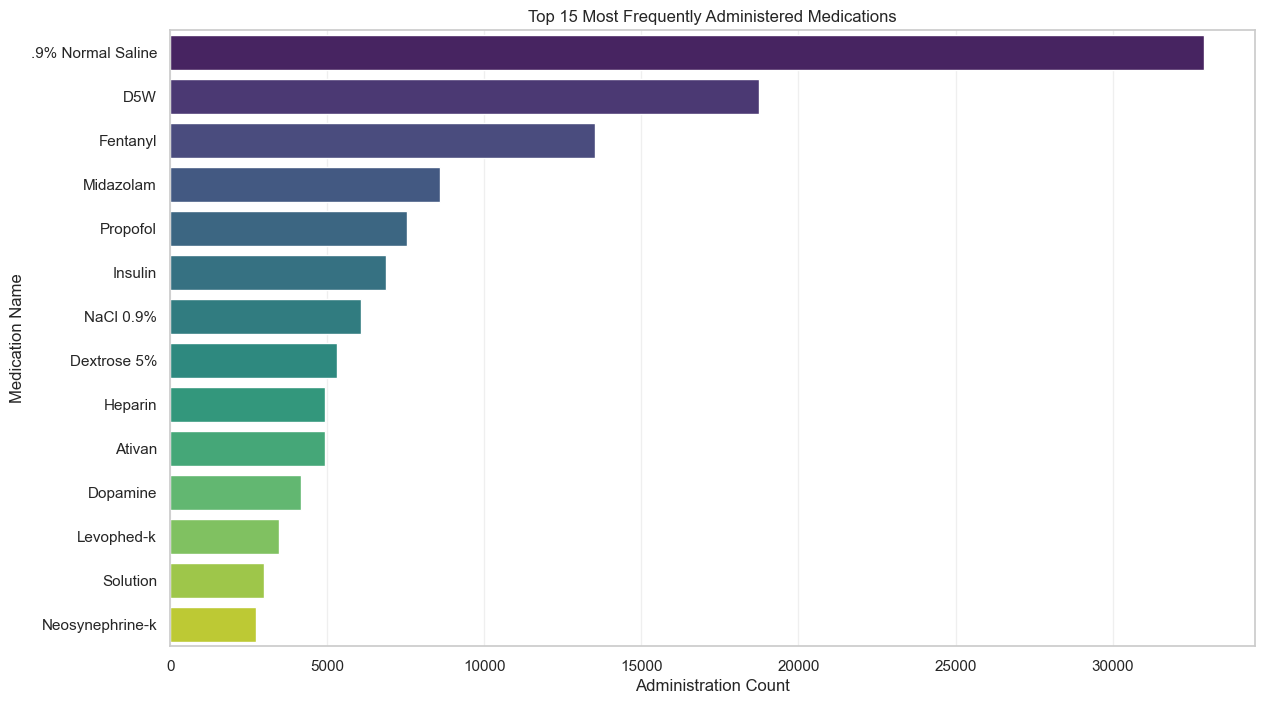

In [588]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [14, 8]

# Merge input events with medication names
input_events = pd.concat([inputevents_cv, inputevents_mv]).merge(
    items[['ITEMID', 'LABEL']].drop_duplicates(), 
    on='ITEMID', 
    how='left'
)

# Convert timestamps
input_events['CHARTTIME'] = pd.to_datetime(input_events['CHARTTIME'])
input_events['STARTTIME'] = pd.to_datetime(input_events['STARTTIME'])
input_events['time'] = input_events['CHARTTIME'].fillna(input_events['STARTTIME'])

# Basic Descriptive Analysis
print("=== INPUT EVENTS ANALYSIS ===")
print(f"Total medication administrations: {len(input_events):,}")
print(f"Unique medication items: {input_events['ITEMID'].nunique()}")
print("\nTop 10 most administered items:")

# Get top items with counts and labels - CORRECTED APPROACH
top_items = (input_events['ITEMID'].value_counts()
            .reset_index(name='COUNT')
            .rename(columns={'index': 'ITEMID'})
            .head(10))

top_items_with_labels = top_items.merge(
    items[['ITEMID', 'LABEL']].drop_duplicates(),
    on='ITEMID',
    how='left'
)

print(top_items_with_labels[['ITEMID', 'LABEL', 'COUNT']])


# Medication Type Analysis with Labels
top_item_ids = input_events['ITEMID'].value_counts().head(15).index
top_items_with_labels = input_events[input_events['ITEMID'].isin(top_item_ids)]

plt.figure(figsize=(14, 8))
sns.countplot(
    data=top_items_with_labels,
    y='LABEL',
    order=top_items_with_labels['LABEL'].value_counts().index,
    palette='viridis'
)
plt.title('Top 15 Most Frequently Administered Medications')
plt.xlabel('Administration Count')
plt.ylabel('Medication Name')
plt.grid(True, axis='x', alpha=0.3)
plt.show()

C:\Users\rodri\AppData\Local\Temp\ipykernel_9836\304031496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_items_with_labels['CHARTTIME'] = pd.to_datetime(top_items_with_labels['CHARTTIME'])
C:\Users\rodri\AppData\Local\Temp\ipykernel_9836\304031496.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_items_with_labels['hour'] = top_items_with_labels['CHARTTIME'].dt.hour


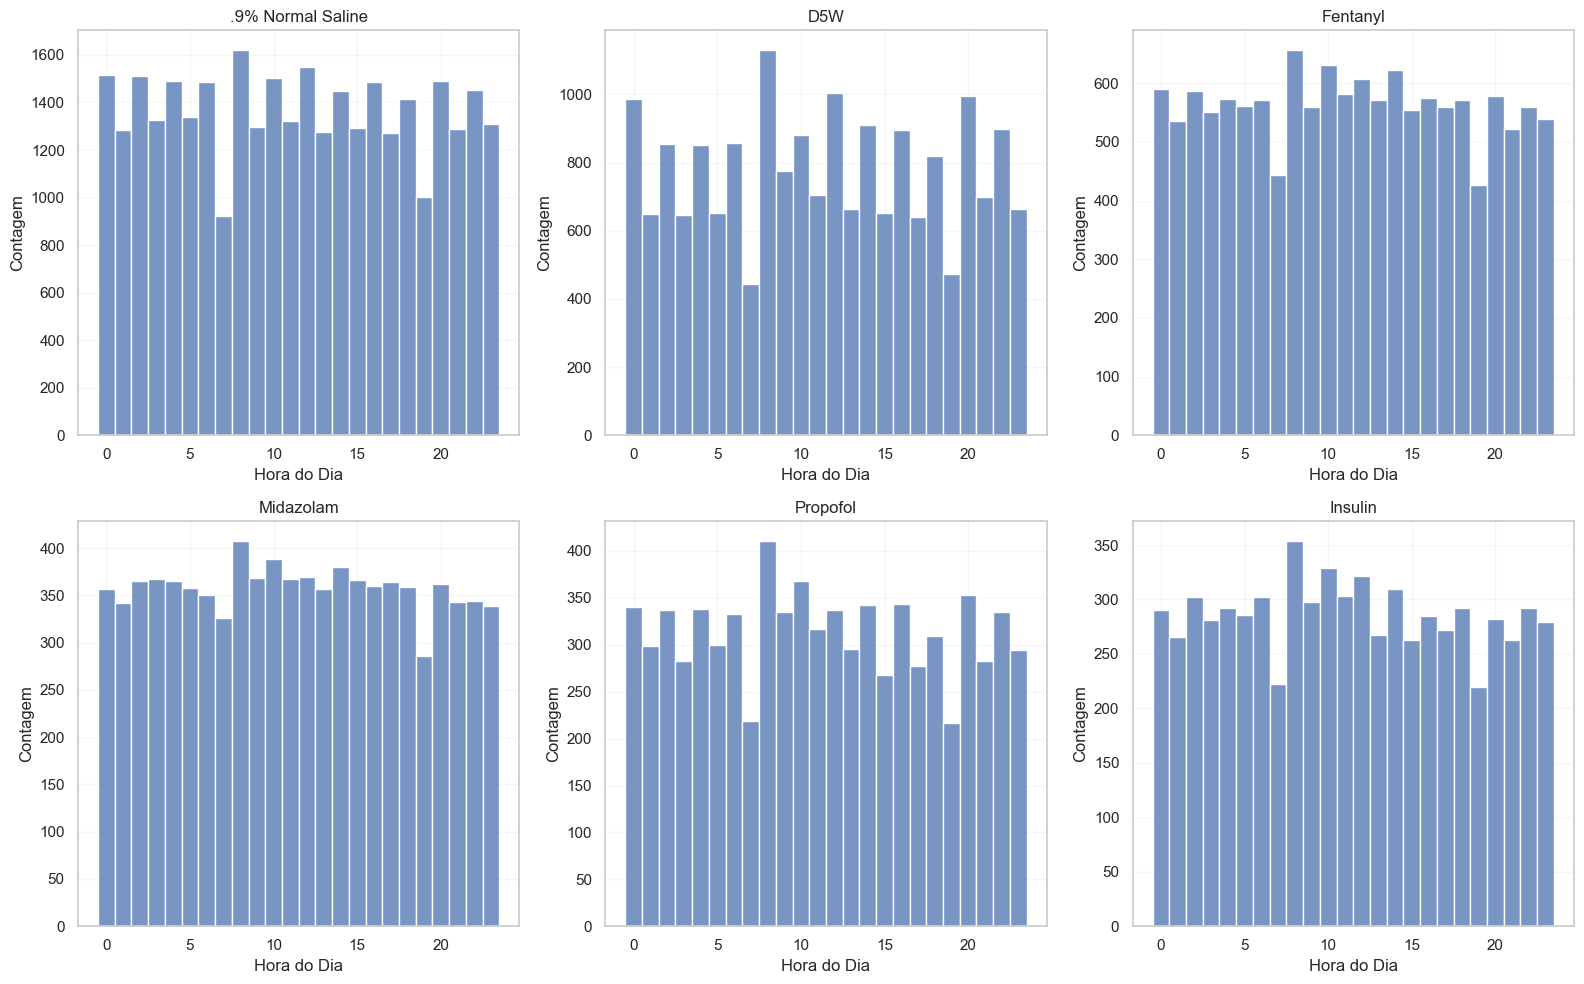

In [589]:
# Certifique-se de que CHARTTIME está em datetime
top_items_with_labels['CHARTTIME'] = pd.to_datetime(top_items_with_labels['CHARTTIME'])

# Criar coluna com a hora do dia (0 a 23)
top_items_with_labels['hour'] = top_items_with_labels['CHARTTIME'].dt.hour

# Plotar histogramas para os 6 medicamentos mais frequentes
plt.figure(figsize=(16, 10))
top_6_labels = top_items_with_labels['LABEL'].value_counts().index[:6]

for i, item_label in enumerate(top_6_labels):
    plt.subplot(2, 3, i+1)
    item_data = top_items_with_labels[top_items_with_labels['LABEL'] == item_label]
    sns.histplot(data=item_data, x='hour', bins=24, discrete=True)
    plt.title(f'{item_label[:30]}' + ('...' if len(item_label) > 30 else ''))
    plt.xlabel('Hora do Dia')
    plt.ylabel('Contagem')
    plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

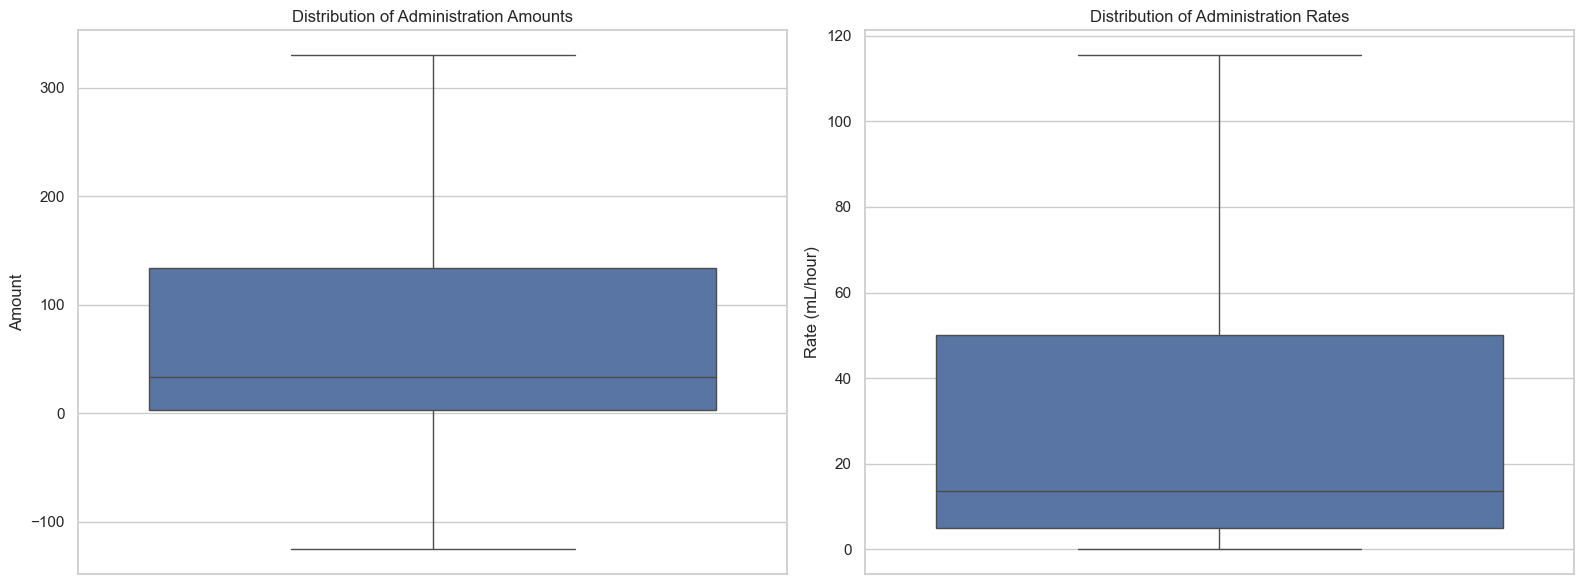

In [590]:
# Rate and Amount Analysis
if all(col in input_events.columns for col in ['RATE', 'AMOUNT']):
    numeric_events = input_events.dropna(subset=['RATE', 'AMOUNT'])
    
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=numeric_events, y='AMOUNT', showfliers=False)
    plt.title('Distribution of Administration Amounts')
    plt.ylabel('Amount')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=numeric_events, y='RATE', showfliers=False)
    plt.title('Distribution of Administration Rates')
    plt.ylabel('Rate (mL/hour)')
    plt.tight_layout()
    plt.show()

### lab events

=== LAB EVENTS ANALYSIS ===
Total lab tests performed: 278,197
Unique lab test items: 475

Top 10 most frequent lab tests:
   ITEMID           LABEL    CATEGORY  COUNT
0   50971       Potassium   Chemistry   8390
1   50983          Sodium   Chemistry   8139
2   50902        Chloride   Chemistry   8050
3   50912      Creatinine   Chemistry   8026
4   51006   Urea Nitrogen   Chemistry   8013
5   50882     Bicarbonate   Chemistry   7986
6   51221      Hematocrit  Hematology   7970
7   50868       Anion Gap   Chemistry   7959
8   50931         Glucose   Chemistry   7900
9   51265  Platelet Count  Hematology   7419


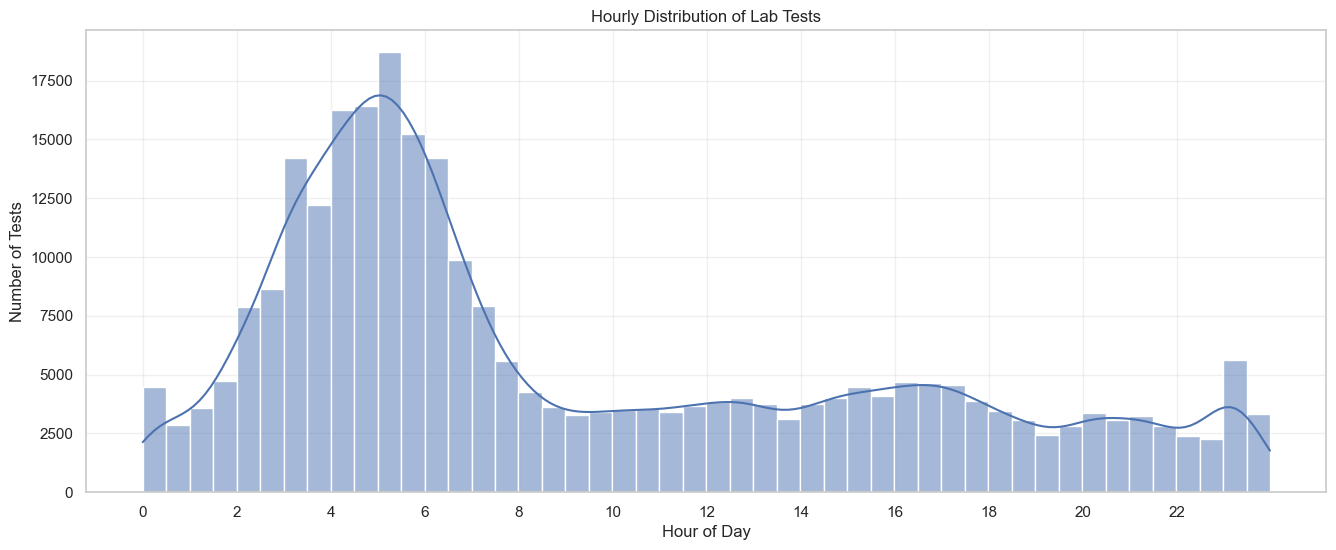

In [591]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [14, 8]

labevents = lab_events.merge(
    labitems[['ITEMID', 'LABEL', 'FLUID', 'CATEGORY']].drop_duplicates(),
    on='ITEMID',
    how='left'
)

# Convert timestamps (adjust column names as needed)
if 'CHARTTIME' in labevents.columns:
    labevents['CHARTTIME'] = pd.to_datetime(labevents['CHARTTIME'])
    labevents['time'] = labevents['CHARTTIME']

# Basic Descriptive Analysis
print("=== LAB EVENTS ANALYSIS ===")
print(f"Total lab tests performed: {len(labevents):,}")
print(f"Unique lab test items: {labevents['ITEMID'].nunique()}")
print("\nTop 10 most frequent lab tests:")

# Get top lab tests with counts and labels
top_labtests = (labevents['ITEMID'].value_counts()
               .reset_index(name='COUNT')
               .rename(columns={'index': 'ITEMID'})
               .head(10)
               .merge(labitems[['ITEMID', 'LABEL', 'CATEGORY']].drop_duplicates(),
                    on='ITEMID',
                    how='left'))

print(top_labtests[['ITEMID', 'LABEL', 'CATEGORY', 'COUNT']])

# Temporal Distribution Analysis
if 'time' in labevents.columns:
    labevents['hour'] = labevents['time'].dt.hour + labevents['time'].dt.minute/60
    
    plt.figure(figsize=(16, 6))
    sns.histplot(data=labevents, x='hour', bins=48, kde=True)
    plt.title('Hourly Distribution of Lab Tests')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Tests')
    plt.xticks(np.arange(0, 24, 2))
    plt.grid(True, alpha=0.3)
    plt.show()


C:\Users\rodri\AppData\Local\Temp\ipykernel_9836\3504466910.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


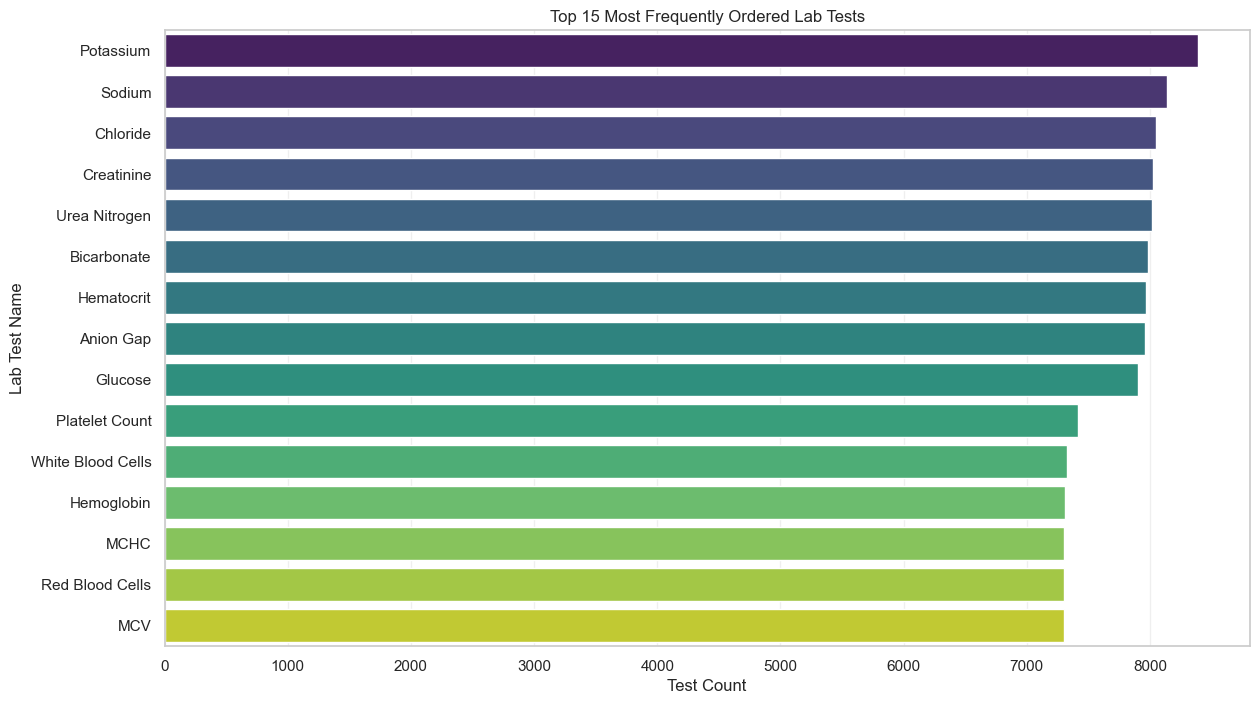

In [592]:
# Lab Test Type Analysis with Labels
top_labtest_ids = labevents['ITEMID'].value_counts().head(15).index
top_labtests_with_labels = labevents[labevents['ITEMID'].isin(top_labtest_ids)]

plt.figure(figsize=(14, 8))
sns.countplot(
    data=top_labtests_with_labels,
    y='LABEL',
    order=top_labtests_with_labels['LABEL'].value_counts().index,
    palette='viridis'
)
plt.title('Top 15 Most Frequently Ordered Lab Tests')
plt.xlabel('Test Count')
plt.ylabel('Lab Test Name')
plt.grid(True, axis='x', alpha=0.3)
plt.show()

C:\Users\rodri\AppData\Local\Temp\ipykernel_9836\2607270047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


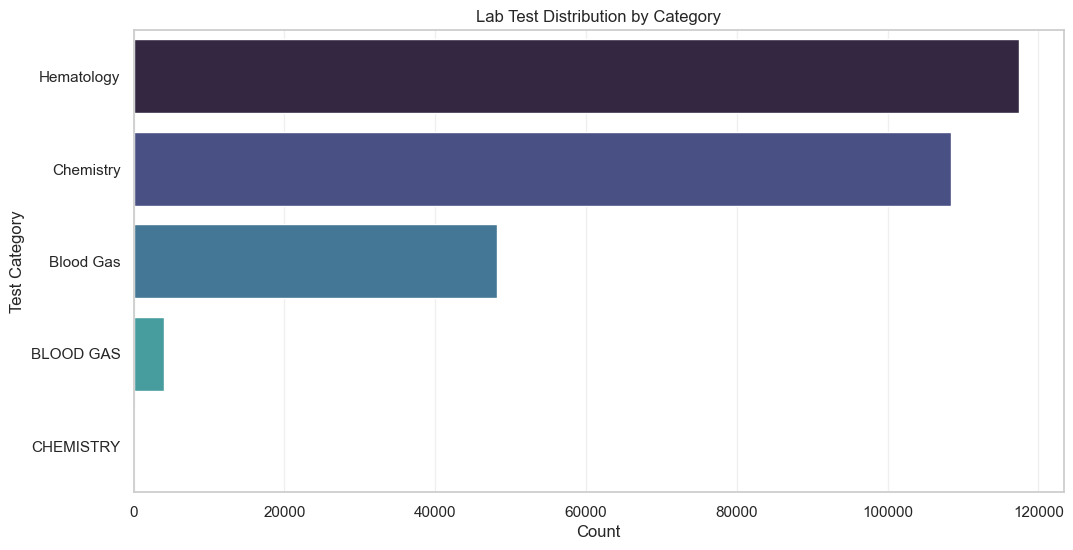

In [593]:
# Analysis by Test Category
plt.figure(figsize=(12, 6))
sns.countplot(
    data=labevents,
    y='CATEGORY',
    order=labevents['CATEGORY'].value_counts().index,
    palette='mako'
)
plt.title('Lab Test Distribution by Category')
plt.xlabel('Count')
plt.ylabel('Test Category')
plt.grid(True, axis='x', alpha=0.3)
plt.show()

C:\Users\rodri\AppData\Local\Temp\ipykernel_9836\324611983.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


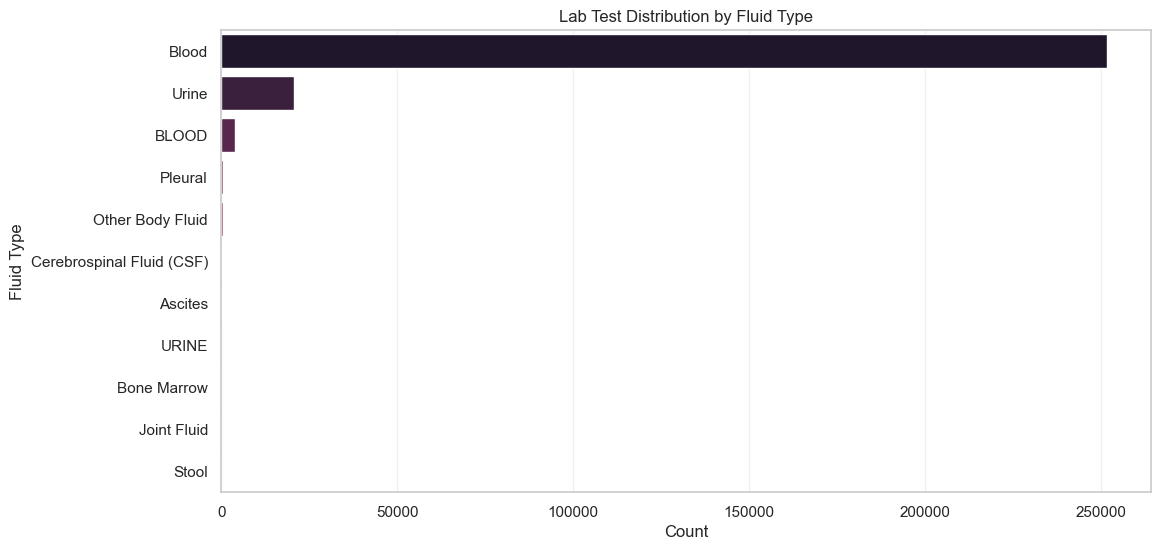

In [594]:
# Analysis by Fluid Type
if 'FLUID' in labevents.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(
        data=labevents,
        y='FLUID',
        order=labevents['FLUID'].value_counts().index,
        palette='rocket'
    )
    plt.title('Lab Test Distribution by Fluid Type')
    plt.xlabel('Count')
    plt.ylabel('Fluid Type')
    plt.grid(True, axis='x', alpha=0.3)
    plt.show()

agora seria fazer:

 -uma analise estatistica de cada paciente (sao muitos, entao provavelmente so de alguns)

 -machine learning para a variavel LOS no tabela icustays, mas as variáveis que importam estão no chart_events, inputevents_cv e inputevents_mv

C:\Users\rodri\AppData\Local\Temp\ipykernel_9836\2627215745.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[time_col] = pd.to_datetime(df[time_col])
C:\Users\rodri\AppData\Local\Temp\ipykernel_9836\2627215745.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hours_since_start'] = (df[time_col] - df[time_col].min()).dt.total_seconds() / 3600


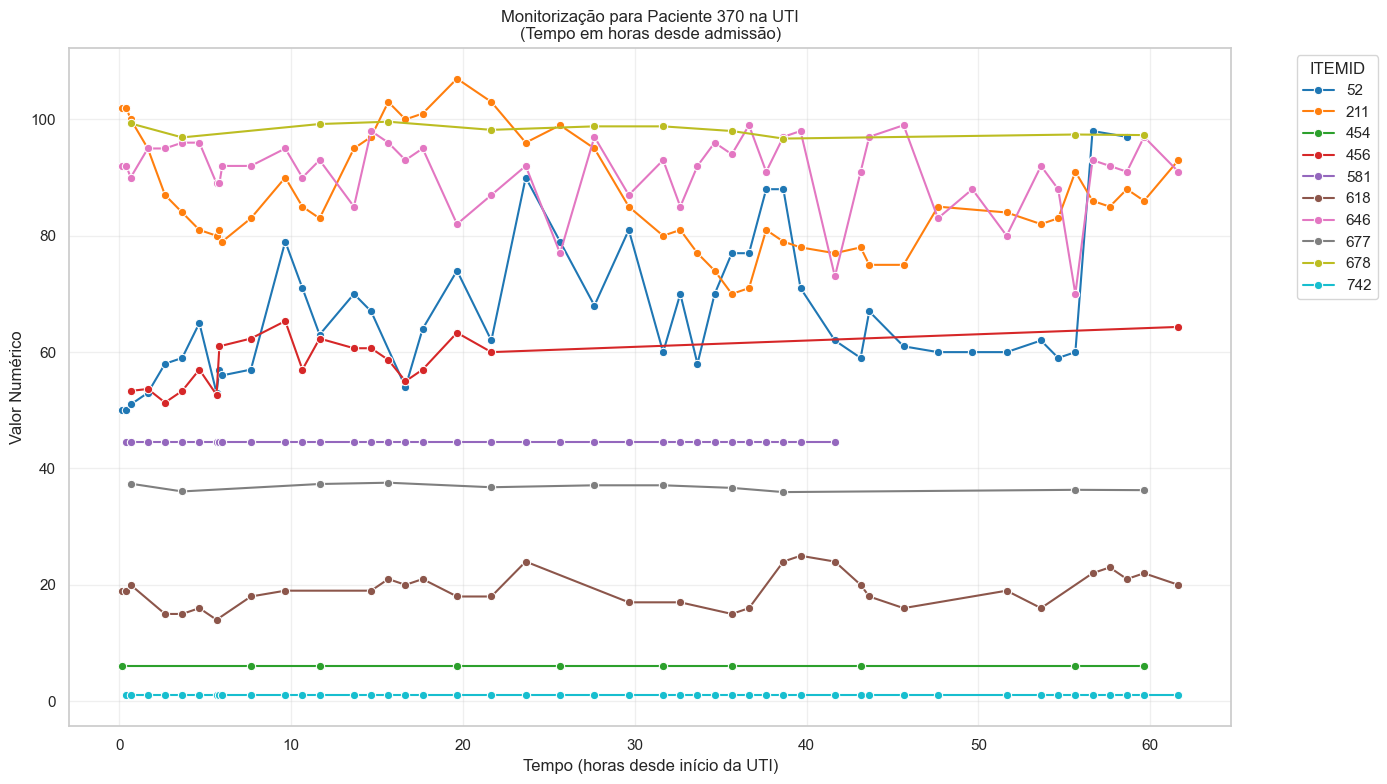

In [595]:
#analise do paciente 804 
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [14, 8]

subject_id = 370
hadm_id = 123421
icustay_id = 228402

def convert_time_hours(df, time_col):
    df[time_col] = pd.to_datetime(df[time_col])
    df['hours_since_start'] = (df[time_col] - df[time_col].min()).dt.total_seconds() / 3600
    return df

charts = chart_events[
    (chart_events['SUBJECT_ID'] == subject_id) & 
    (chart_events['HADM_ID'] == hadm_id) & 
    (chart_events['ICUSTAY_ID'] == icustay_id)
]

if not charts.empty:
    charts = convert_time_hours(charts, 'CHARTTIME') 
    charts_numeric = charts.dropna(subset=['VALUENUM'])
    
    # Selecionar os 10 itens mais frequentes
    top_items = charts_numeric['ITEMID'].value_counts().head(10).index
    charts_top = charts_numeric[charts_numeric['ITEMID'].isin(top_items)]
    
    plt.figure(figsize=(14, 8))
    sns.lineplot(
        data=charts_top, 
        x='hours_since_start', 
        y='VALUENUM', 
        hue='ITEMID', 
        palette='tab10',
        marker='o'
    )
    plt.title(f'Monitorização para Paciente {subject_id} na UTI\n(Tempo em horas desde admissão)')
    plt.xlabel('Tempo (horas desde início da UTI)')
    plt.ylabel('Valor Numérico')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='ITEMID')
    plt.tight_layout()
    plt.grid(True, alpha=0.3)
    plt.show()

else:
    print("Nenhum dado encontrado para esse paciente.")

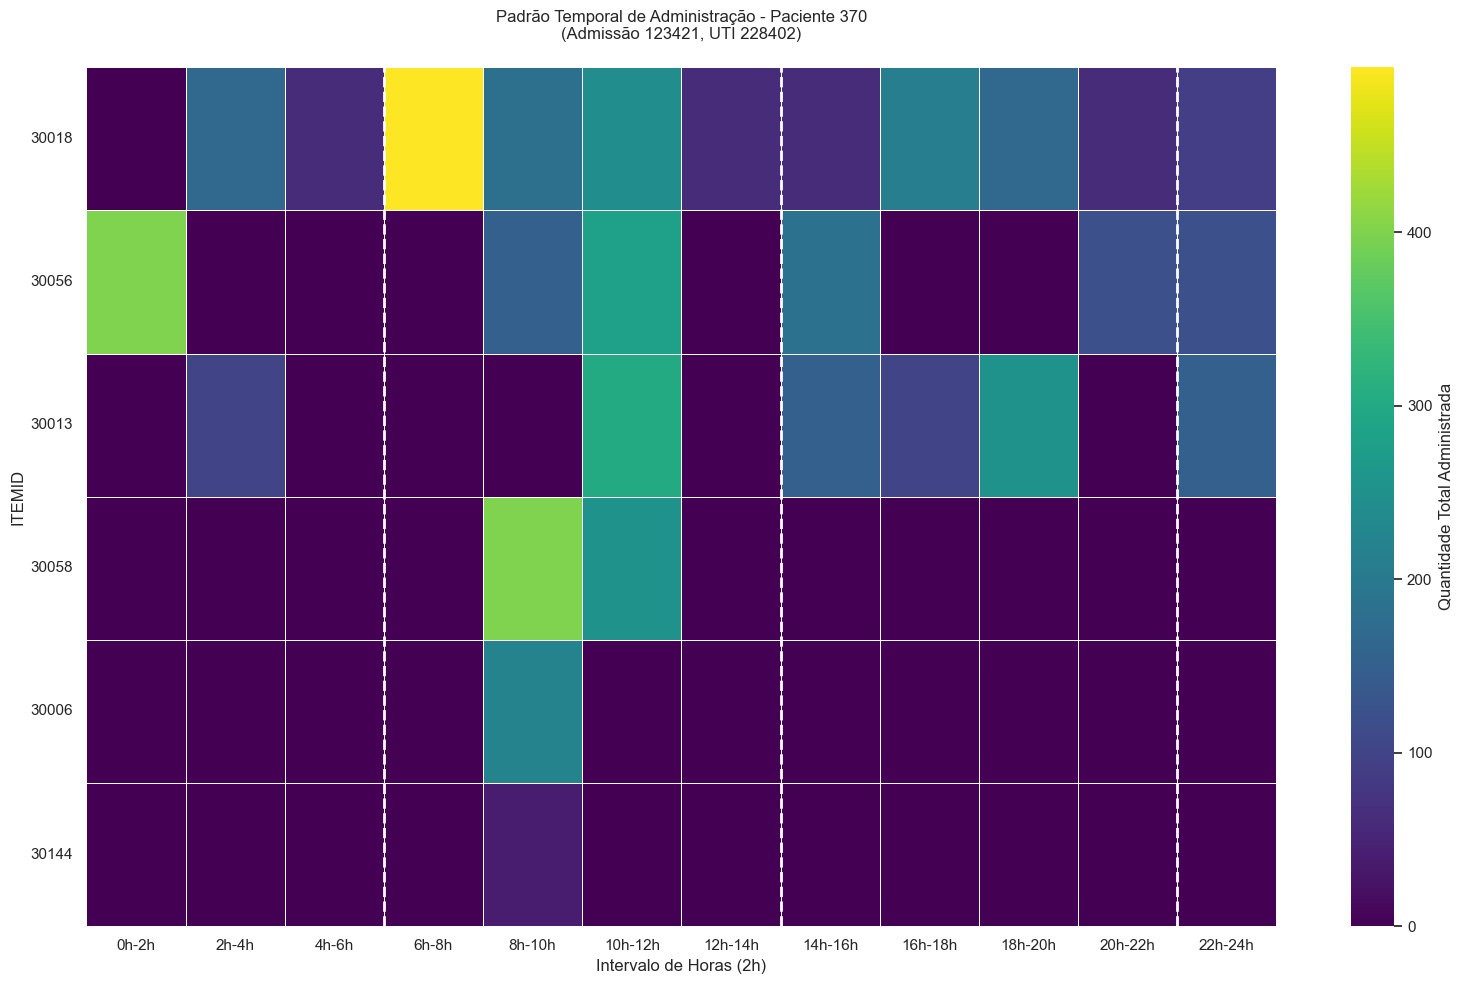


Itens administrados por turno:
shift   Manhã (0-8h)  Tarde (8-16h)  Noite (16-24h)
ITEMID                                             
30006            0.0          221.0             0.0
30013          100.0          550.0           400.0
30018          870.0          600.0           315.0
30056          150.0          465.0           240.0
30058          400.0          250.0             0.0
30144           40.0            0.0             0.0


C:\Users\rodri\AppData\Local\Temp\ipykernel_9836\2867284421.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(input_events.groupby(['ITEMID', 'shift'])['AMOUNT'].sum().unstack().fillna(0))


In [596]:
def convert_time(df, time_col):
    df[time_col] = pd.to_datetime(df[time_col])
    df['hour'] = df[time_col].dt.hour + df[time_col].dt.minute/60
    return df

input_events = pd.concat([
    inputevents_cv[
        (inputevents_cv['SUBJECT_ID'] == subject_id) & 
        (inputevents_cv['HADM_ID'] == hadm_id) & 
        (inputevents_cv['ICUSTAY_ID'] == icustay_id)
    ],
    inputevents_mv[
        (inputevents_mv['SUBJECT_ID'] == subject_id) & 
        (inputevents_mv['HADM_ID'] == hadm_id) & 
        (inputevents_mv['ICUSTAY_ID'] == icustay_id)
    ]
])

if not input_events.empty:
    input_events = convert_time(input_events, 'CHARTTIME' if 'CHARTTIME' in input_events.columns else 'STARTTIME')
    
    input_events['hour_bin'] = (input_events['hour'] // 2) * 2
    
    heatmap_data = input_events.pivot_table(
        index='ITEMID',
        columns='hour_bin',
        values='AMOUNT',
        aggfunc='sum',
        fill_value=0
    )
    
    heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1).sort_values(ascending=False).index]
    
    hour_bins = sorted(input_events['hour_bin'].unique())
    hour_labels = [f"{int(h)}h-{int(h)+2}h" for h in hour_bins]
    
    plt.figure(figsize=(16, 10))
    sns.heatmap(
        heatmap_data,
        cmap='viridis',
        cbar_kws={'label': 'Quantidade Total Administrada'},
        linewidths=0.5,
        xticklabels=hour_labels
    )
    
    plt.title(f'Padrão Temporal de Administração - Paciente {subject_id}\n(Admissão {hadm_id}, UTI {icustay_id})', pad=20)
    plt.xlabel('Intervalo de Horas (2h)')
    plt.ylabel('ITEMID')
    plt.yticks(rotation=0)
    
    for shift in [8, 16, 24]:
        bin_position = (shift // 2) - 1
        if bin_position < len(hour_bins):
            plt.axvline(x=bin_position, color='white', linestyle='--', linewidth=2)
    
    plt.tight_layout()
    plt.show()
    
    # Estatísticas por turno
    print("\nItens administrados por turno:")
    input_events['shift'] = pd.cut(input_events['hour'], 
                                 bins=[0, 8, 16, 24], 
                                 labels=['Manhã (0-8h)', 'Tarde (8-16h)', 'Noite (16-24h)'])
    print(input_events.groupby(['ITEMID', 'shift'])['AMOUNT'].sum().unstack().fillna(0))
else:
    print("Nenhum dado de administração encontrado para este paciente.")

## Modelo (prever lenght of stay)

features:

-top 50 items usados e o top 50 menos usados (os testes mais normais, ou seja, que se fazem hora a hora, fazer media do dia) (chart_events) x

-idade/data de nascimento (tabela dos patients) x

-icd_code2 e 3 (tabela_codigos) x

-dosagem como os items têm diferentes medidas é preciso padronizar isso (chart_events)

- genero e etnia da pessoa x

In [597]:
def is_all_numeric(df):
    ret=True
    for col in df.columns:
        col_dtype = df[col].dtype
        if not (
            np.issubdtype(col_dtype, np.number)  # catches int, float, double
            or np.issubdtype(col_dtype, np.floating)  # float, double
            or np.issubdtype(col_dtype, np.integer)   # int
        ):
            print(col)
            ret = False
    return ret

### Construir a tabela

In [598]:
diagnoses_inf = diagnoses[(diagnoses['ICD9_CODE'] == '486') & (diagnoses['SEQ_NUM'] == 1)]

diagnoses_seq2 = diagnoses[diagnoses['SEQ_NUM'] == 2][['SUBJECT_ID', 'HADM_ID', 'ICD9_CODE']].rename(columns={'ICD9_CODE': 'ICD9_CODE_2'})
diagnoses_seq3 = diagnoses[diagnoses['SEQ_NUM'] == 3][['SUBJECT_ID', 'HADM_ID', 'ICD9_CODE']].rename(columns={'ICD9_CODE': 'ICD9_CODE_3'})

merged = diagnoses_inf.merge(diagnoses_seq2, on=['SUBJECT_ID', 'HADM_ID'], how='left')
merged = merged.merge(diagnoses_seq3, on=['SUBJECT_ID', 'HADM_ID'], how='left')

tabela_codigos = merged[['SUBJECT_ID', 'HADM_ID', 'ICD9_CODE', 'ICD9_CODE_2', 'ICD9_CODE_3']]

print(tabela_codigos)

     SUBJECT_ID  HADM_ID ICD9_CODE ICD9_CODE_2 ICD9_CODE_3
0           111   192123       486       49121        4139
1           242   192980       486         496       51889
2           346   195392       486       42731        4241
3           368   105889       486       49121       41071
4           370   123421       486       20410         496
..          ...      ...       ...         ...         ...
720       96244   186668       486       34831        5849
721       95895   145111       486       51881        2762
722       95895   179838       486       51884       49121
723       99937   129380       486        1120         515
724       96004   141589       486       51881        1623

[725 rows x 5 columns]


In [599]:
#top 50 items e top 50 menos usados
hadm_ids = icustays['HADM_ID'].unique()

item_usage_counts = (
    chart_events[['HADM_ID', 'ITEMID']]
    .drop_duplicates()
    .groupby('ITEMID')
    .size()
    .sort_values(ascending=False)
)

# Selecionar top e bottom 50 com base nisso
top_50_items = item_usage_counts.head(50).index.tolist()
selected_items = top_50_items

filtered = chart_events[
    (chart_events['ITEMID'].isin(selected_items)) &
    (chart_events['HADM_ID'].isin(hadm_ids))
].copy()

filtered['USED'] = 1

# Contar quantas vezes cada ITEMID foi usado por HADM_ID
pivot = (
    filtered
    .groupby(['HADM_ID', 'ITEMID'])['USED']
    .count()  # <-- Alterado de .max() para .count()
    .unstack(fill_value=0)
)

# Reordenar e manter nome das colunas como 'has_item_{ITEMID}'
pivot = pivot.reindex(columns=selected_items, fill_value=0)
pivot.columns = [f'has_item_{col}' for col in pivot.columns]
pivot = pivot.reindex(index=hadm_ids, fill_value=0)

# Reset index e adicionar SUBJECT_ID e LOS
pivot = pivot.reset_index()
pivot = pivot.merge(
    icustays[['HADM_ID', 'SUBJECT_ID', 'LOS']],
    on='HADM_ID',
    how='left'
)

# Verificar resultado
print(pivot.shape)
print(pivot.head())

(763, 53)
   HADM_ID  has_item_220645  has_item_225624  has_item_227073  \
0   195392                0                0                0   
1   192123                0                0                0   
2   192980                0                0                0   
3   117876               24               24               23   
4   105889                0                0                0   

   has_item_220615  has_item_220621  has_item_220602  has_item_220545  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3               24               26               24               17   
4                0                0                0                0   

   has_item_227442  has_item_227443  ...  has_item_225640  has_item_225639  \
0                0                0  ...                0                0   
1   

In [600]:
# Contar o número de internações em que cada ITEMID foi usado
item_hadm_counts = (
    chart_events[['HADM_ID', 'ITEMID']]
    .drop_duplicates()
    .groupby('ITEMID')
    .size()
)

# Selecionar os ITEMIDs que aparecem em menos de x internações
rare_items = item_hadm_counts[item_hadm_counts < 2].index.tolist()

# Filtrar para obter apenas os eventos com esses items raros e HADM_IDs válidos
rare_usage = chart_events[
    (chart_events['ITEMID'].isin(rare_items)) &
    (chart_events['HADM_ID'].isin(hadm_ids))
][['HADM_ID', 'ITEMID']].drop_duplicates()

# Contar quantos itens raros foram usados por cada internação
rare_item_counts_per_hadm = (
    rare_usage.groupby('HADM_ID')
    .size()
    .rename('rare_item_count')
    .reset_index()
)

# Juntar à pivot com base no HADM_ID
pivot = pivot.merge(rare_item_counts_per_hadm, on='HADM_ID', how='left')

# Preencher com 0 para os casos onde nenhum item raro foi usado
pivot['rare_item_count'] = pivot['rare_item_count'].fillna(0).astype(int)

print(pivot.shape)  
print(pivot.head())

(763, 54)
   HADM_ID  has_item_220645  has_item_225624  has_item_227073  \
0   195392                0                0                0   
1   192123                0                0                0   
2   192980                0                0                0   
3   117876               24               24               23   
4   105889                0                0                0   

   has_item_220615  has_item_220621  has_item_220602  has_item_220545  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3               24               26               24               17   
4                0                0                0                0   

   has_item_227442  has_item_227443  ...  has_item_225639  has_item_225641  \
0                0                0  ...                0                0   
1   

In [601]:
#dosagens
# Calcular médias de dose por HADM_ID e ITEMID
dosage_means = (
    chart_events
    .dropna(subset=['VALUENUM']) 
    .groupby(['HADM_ID', 'ITEMID'])['VALUENUM']
    .mean()
    .unstack()
)

dosage_means = dosage_means.reindex(columns=selected_items, fill_value=0)
dosage_means = dosage_means.add_prefix('MEAN_DOSE_')
dosage_means = dosage_means.reset_index()
pivot = pivot.merge(dosage_means, on='HADM_ID', how='left')

dose_columns = [col for col in pivot.columns if isinstance(col, str) and col.startswith('MEAN_DOSE_')]
pivot[dose_columns] = pivot[dose_columns].fillna(0)

if 'LOS' not in pivot.columns:
    pivot = pivot.merge(
        icustays_filtered[['HADM_ID', 'LOS']].drop_duplicates(subset='HADM_ID'),
        on='HADM_ID',
        how='left'
    )

print(pivot.shape)
print(pivot.head())

(763, 104)
   HADM_ID  has_item_220645  has_item_225624  has_item_227073  \
0   195392                0                0                0   
1   192123                0                0                0   
2   192980                0                0                0   
3   117876               24               24               23   
4   105889                0                0                0   

   has_item_220615  has_item_220621  has_item_220602  has_item_220545  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3               24               26               24               17   
4                0                0                0                0   

   has_item_227442  has_item_227443  ...  MEAN_DOSE_225643  MEAN_DOSE_225642  \
0                0                0  ...          0.000000          0.000000   

In [602]:
#ICD9_CODES
pivot = pivot.merge(
    tabela_codigos[['HADM_ID', 'ICD9_CODE_2', 'ICD9_CODE_3']],
    on='HADM_ID',
    how='left'  
)

print(pivot.shape) 
print(pivot.head())

(763, 106)
   HADM_ID  has_item_220645  has_item_225624  has_item_227073  \
0   195392                0                0                0   
1   192123                0                0                0   
2   192980                0                0                0   
3   117876               24               24               23   
4   105889                0                0                0   

   has_item_220615  has_item_220621  has_item_220602  has_item_220545  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3               24               26               24               17   
4                0                0                0                0   

   has_item_227442  has_item_227443  ...  MEAN_DOSE_225640  MEAN_DOSE_225639  \
0                0                0  ...          0.000000          0.000000   

In [603]:
#age
intime_unique = icustays[['HADM_ID', 'INTIME']].drop_duplicates(subset='HADM_ID')
dob_unique = patients[['SUBJECT_ID', 'DOB']].drop_duplicates(subset='SUBJECT_ID')

# Merge INTIME com pivot (com base no HADM_ID)
pivot = pivot.merge(intime_unique, on='HADM_ID', how='left')

# Merge DOB com pivot (com base no SUBJECT_ID)
pivot = pivot.merge(dob_unique, on='SUBJECT_ID', how='left')

# Converter para datetime, tratando erros
pivot['DOB'] = pd.to_datetime(pivot['DOB'], errors='coerce')
pivot['INTIME'] = pd.to_datetime(pivot['INTIME'], errors='coerce')

# Calcular idade com base apenas no ano
pivot['AGE'] = pivot['INTIME'].dt.year - pivot['DOB'].dt.year

# Remover colunas temporárias (opcional)
pivot = pivot.drop(columns=['DOB', 'INTIME'])

# Verificar tamanho e amostra
print(pivot.shape) 
print(pivot.head())

(763, 107)
   HADM_ID  has_item_220645  has_item_225624  has_item_227073  \
0   195392                0                0                0   
1   192123                0                0                0   
2   192980                0                0                0   
3   117876               24               24               23   
4   105889                0                0                0   

   has_item_220615  has_item_220621  has_item_220602  has_item_220545  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3               24               26               24               17   
4                0                0                0                0   

   has_item_227442  has_item_227443  ...  MEAN_DOSE_225639  MEAN_DOSE_225641  \
0                0                0  ...          0.000000          0.000000   

In [604]:
#a idade máxima é 89, entao valores acima de tal é para passar para 89

pivot.loc[pivot['AGE'] > 89, 'AGE'] = 89

In [605]:
admissions_selected = admissions[['HADM_ID', 'ADMISSION_LOCATION', 'RELIGION', 
                                  'MARITAL_STATUS', 'ETHNICITY', 'INSURANCE']]

# Fazer o merge com a tabela pivot usando HADM_ID
pivot = pivot.merge(admissions_selected, on='HADM_ID', how='left')

# Visualizar o resultado
print(pivot.shape)
print(pivot.head())

(763, 112)
   HADM_ID  has_item_220645  has_item_225624  has_item_227073  \
0   195392                0                0                0   
1   192123                0                0                0   
2   192980                0                0                0   
3   117876               24               24               23   
4   105889                0                0                0   

   has_item_220615  has_item_220621  has_item_220602  has_item_220545  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3               24               26               24               17   
4                0                0                0                0   

   has_item_227442  has_item_227443  ...  MEAN_DOSE_225698  MEAN_DOSE_223830  \
0                0                0  ...               0.0             0.000   

In [606]:
from sklearn.preprocessing import MinMaxScaler

dose_columns = [col for col in pivot.columns if isinstance(col, str) and col.startswith('MEAN_DOSE_')]


scaler = MinMaxScaler()
pivot_scaled = pivot.copy()
pivot_scaled[dose_columns] = scaler.fit_transform(pivot[dose_columns])
pivot_scaled.rename(columns={col: col + '_NORM' for col in dose_columns}, inplace=True)

In [607]:
print(pivot_scaled.shape)
print(pivot_scaled.head())

(763, 112)
   HADM_ID  has_item_220645  has_item_225624  has_item_227073  \
0   195392                0                0                0   
1   192123                0                0                0   
2   192980                0                0                0   
3   117876               24               24               23   
4   105889                0                0                0   

   has_item_220615  has_item_220621  has_item_220602  has_item_220545  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3               24               26               24               17   
4                0                0                0                0   

   has_item_227442  has_item_227443  ...  MEAN_DOSE_225698_NORM  \
0                0                0  ...               0.000000   
1                0       

ATE AQUI ESTA TUDO IGUAL

tratar de missing values, one-hot enconding e selecionar apenas as variaveis significativas

In [608]:
pivot=pivot_scaled.copy()

missing_summary = pivot.isna().sum()
missing_summary = missing_summary[missing_summary > 0]  # Mostrar apenas colunas com pelo menos um NaN

print("Colunas com valores ausentes:")
print(missing_summary.sort_values(ascending=False))

Colunas com valores ausentes:
MARITAL_STATUS    21
RELIGION           4
dtype: int64


Por todas as entradas a valores numericos

In [609]:
# (Re)criar colunas para ICD9
def icd9_to_chapter(code):
    try:
        code = float(str(code).strip()[:3])
    except:
        return 'Unknown'
    if 1 <= code <= 139:
        return 'Infectious'
    elif 140 <= code <= 239:
        return 'Neoplasms'
    elif 240 <= code <= 279:
        return 'Endocrine'
    elif 280 <= code <= 289:
        return 'Blood'
    elif 290 <= code <= 319:
        return 'Mental'
    elif 320 <= code <= 389:
        return 'Nervous'
    elif 390 <= code <= 459:
        return 'Circulatory'
    elif 460 <= code <= 519:
        return 'Respiratory'
    elif 520 <= code <= 579:
        return 'Digestive'
    elif 580 <= code <= 629:
        return 'Genitourinary'
    elif 630 <= code <= 679:
        return 'Pregnancy'
    elif 680 <= code <= 709:
        return 'Skin'
    elif 710 <= code <= 739:
        return 'Musculoskeletal'
    elif 740 <= code <= 759:
        return 'Congenital'
    elif 760 <= code <= 779:
        return 'Perinatal'
    elif 780 <= code <= 799:
        return 'Ill-defined'
    elif 800 <= code <= 999:
        return 'Injury'
    else:
        return 'Other'

pivot['ICD9_CHAPTER_2'] = pivot['ICD9_CODE_2'].apply(icd9_to_chapter)
pivot['ICD9_CHAPTER_3'] = pivot['ICD9_CODE_3'].apply(icd9_to_chapter)

# Mostrar forma final
print("Número final de colunas:", pivot.shape[1])

Número final de colunas: 114


In [610]:
# Columns to process
cat_cols = ['RELIGION', 'ETHNICITY', 'MARITAL_STATUS','ADMISSION_LOCATION', 'INSURANCE', 'ICD9_CHAPTER_2', 'ICD9_CHAPTER_3']  # Add others as needed

# Step 1: Group rare categories into 'Other'
threshold = 15  # Adjust threshold as needed
for col in cat_cols:
    freq = pivot[col].value_counts()
    rare = freq[freq < threshold].index
    pivot[col] = pivot[col].apply(lambda x: 'Other' if x in rare else x)

# Step 2: Ordinal encode (top 8 -> 1-8, rest/Other -> 0)
for col in cat_cols:
    top_categories = pivot[col].value_counts().index.tolist()
    pivot[col] = pivot[col].apply(
        lambda x: top_categories.index(x) + 1 if x in top_categories else 0
    )

# Check results
print(pivot.head())

   HADM_ID  has_item_220645  has_item_225624  has_item_227073  \
0   195392                0                0                0   
1   192123                0                0                0   
2   192980                0                0                0   
3   117876               24               24               23   
4   105889                0                0                0   

   has_item_220615  has_item_220621  has_item_220602  has_item_220545  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3               24               26               24               17   
4                0                0                0                0   

   has_item_227442  has_item_227443  ...  ICD9_CODE_2  ICD9_CODE_3  AGE  \
0                0                0  ...        42731         4241   85   
1                0  

In [611]:
# é necessario retirar colunas dos items tambem

item_usage_df = pivot.loc[:, pivot.columns.str.startswith('has_item_')]

# Verificar se são todas binárias (devem conter apenas 0, 1 ou NaN)
binary_check = item_usage_df.apply(lambda col: col.dropna().isin([0, 1]).all())
binary_cols = item_usage_df.columns[binary_check].tolist()

# Subconjunto apenas com as colunas binárias
binary_item_df = item_usage_df[binary_cols]

# Calcular matriz de correlação
correlation_matrix = binary_item_df.corr()

# Identificar pares com correlação alta (> 0.9)
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr = correlation_matrix.iloc[i, j]
        if abs(corr) > 0.80:
            high_corr_pairs.append((col1, col2, corr))

# Mostrar os pares mais correlacionados
high_corr_pairs[:50]



[]

ha altas correlaçoes, entao vamos retirar colunas redundantes e alterar o valor das dosagens para uma media de todas as que foram agrupadas

In [612]:
# Definir colunas de uso de item e de dosagem
item_cols = pivot.loc[:, pivot.columns.str.startswith('has_item_')]
dose_cols = pivot.loc[:, pivot.columns.str.startswith('MEAN_DOSE')]

# Confirmar que todas são binárias
binary_cols = [col for col in item_cols if pivot[col].dropna().isin([0, 1]).all()]
item_df = pivot[binary_cols]

# Calcular matriz de correlação entre colunas binárias
corr_matrix = item_df.corr()

# Identificar grupos altamente correlacionados
threshold = 0.80
visited = set()
groups = []

for col in corr_matrix.columns:
    if col not in visited:
        high_corr = corr_matrix[col][corr_matrix[col] > threshold].index.tolist()
        group = list(set(high_corr) - visited)
        if len(group) > 1:
            groups.append(group)
        visited.update(group)

# Função para nome de coluna de dosagem
def dose_col_name(code):
    return f"MEAN_DOSE_{code}_NORM"

for group in groups:
    keeper = group[0]  # coluna do tipo 'has_item_XXX'
    to_remove = group[1:]

    # Extrair os ITEMIDs (remover o prefixo 'has_item_')
    group_ids = [col.replace('has_item_', '') for col in group]
    keeper_id = keeper.replace('has_item_', '')
    to_remove_ids = [col.replace('has_item_', '') for col in to_remove]

    # Construir nomes das colunas de dosagem existentes
    dose_cols_group = [dose_col_name(itemid) for itemid in group_ids if dose_col_name(itemid) in pivot.columns]

    # Se existirem colunas de dosagem para o grupo
    if dose_cols_group:
        # Calcular média linha a linha e guardar no MEAN_DOSE do item "keeper"
        pivot[dose_col_name(keeper_id)] = pivot[dose_cols_group].mean(axis=1)

    # Remover colunas binárias redundantes (mantém só o 'keeper')
    pivot.drop(columns=to_remove, inplace=True, errors='ignore')

    # Remover colunas de dosagem redundantes (todas exceto o keeper)
    for itemid in to_remove_ids:
        colname = dose_col_name(itemid)
        if colname in pivot.columns:
            pivot.drop(columns=colname, inplace=True)

# Resultado final
print(pivot.shape)
print(pivot.head())

(763, 114)
   HADM_ID  has_item_220645  has_item_225624  has_item_227073  \
0   195392                0                0                0   
1   192123                0                0                0   
2   192980                0                0                0   
3   117876               24               24               23   
4   105889                0                0                0   

   has_item_220615  has_item_220621  has_item_220602  has_item_220545  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3               24               26               24               17   
4                0                0                0                0   

   has_item_227442  has_item_227443  ...  ICD9_CODE_2  ICD9_CODE_3  AGE  \
0                0                0  ...        42731         4241   85   
1        

In [613]:
# # Identificar colunas que começam com 'has_item_'
# item_cols_to_drop = pivot.columns[pivot.columns.str.startswith('has_item_')]

# # Remover essas colunas do dataframe
# pivot = pivot.drop(columns=item_cols_to_drop)


# print(pivot.shape)
# print(pivot.head())

testar modelos, no caso, RFregressor e Lasso e kneighbors regressor(aqui é melhor reduzir ainda mais o numero de colunas)
talvez ver um modelo de classes tambem, dividindo o tempo em 3 classes e prevendo em que espaço de tempo(classe) o paciente fica

-ter em atençao tirar as colunas HADM_ID e SUBJECT_ID
-definir bem a janela da LOS

com isto perceber quais as colunas mais importantes e testar de novo

enfiar esta merda no relatorio:
High Cardinality Features:

    If a categorical variable has many unique values (e.g., "City" with 100+ categories), one-hot encoding will create a large number of binary columns.

    This increases the dimensionality of the dataset, which can cause the model to memorize noise (overfit) rather than generalize, especially with limited data.

In [614]:
pivot.drop(['HADM_ID', 'SUBJECT_ID', 'ICD9_CODE_3', 'ICD9_CODE_2'], inplace=True, axis=1)
pivot['LOS'] = np.clip(pivot['LOS'], 0.1, 12.1)
pivot

,has_item_220645,has_item_225624,has_item_227073,has_item_220615,has_item_220621,has_item_220602,has_item_220545,has_item_227442,has_item_227443,has_item_220546,...,MEAN_DOSE_225698_NORM,MEAN_DOSE_223830_NORM,AGE,ADMISSION_LOCATION,RELIGION,MARITAL_STATUS,ETHNICITY,INSURANCE,ICD9_CHAPTER_2,ICD9_CHAPTER_3
0,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,85,1,1,3,2,1,2,1
1,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,67,1,3,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,77,3,1,3,4,1,1,2
3,24,24,23,24,26,24,17,24,23,17,...,0.665217,0.972787,64,1,2,1,1,2,6,10
4,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,89,1,2,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,7,7,7,7,7,7,6,7,7,6,...,0.570652,0.981946,51,2,2,1,3,2,2,3
759,1,1,1,1,1,1,1,1,1,1,...,0.000000,0.000000,80,1,2,1,1,1,1,5
760,1,1,1,1,1,1,2,1,1,1,...,0.760870,0.981506,77,1,2,1,1,1,3,2
761,3,3,3,3,3,3,3,3,3,3,...,0.000000,0.000000,84,1,1,3,1,1,3,9


In [616]:
#pivot.to_csv('C:/Users/rodri/Downloads/pivot.csv', index=False)

In [617]:
X = pivot.drop('LOS', axis=1)  # Replace with your actual target column
y = pivot['LOS']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
models = {
    # Linear Models
    "Linear Regression": LinearRegression(),
    "Ridge (L2)": Ridge(alpha=1.0),
    "Lasso (L1)": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    
    # Tree-Based
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    
    # Boosting Algorithms
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=50, random_state=42),
    
    # Other
    "k-NN": KNeighborsRegressor(n_neighbors=5),
    "Support Vector (SVR)": SVR(kernel='rbf', C=1.0),
    "Neural Network (MLP)": MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
}

In [619]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
for name, model in models.items():
    model = model.fit(X_train, y_train)
    preds = model.predict(X_test)
    model.fit(X_train, y_train)

    print(f"\n{name} results:")
    print(f"R² Score: {r2_score(y_test, preds):.4f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, preds):.4f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, preds)):.4f}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, preds):.4f}")
    


Linear Regression results:
R² Score: -0.4226
Mean Squared Error (MSE): 16.0717
Root Mean Squared Error (RMSE): 4.0090
Mean Absolute Error (MAE): 2.2813

Ridge (L2) results:
R² Score: 0.3617
Mean Squared Error (MSE): 7.2108
Root Mean Squared Error (RMSE): 2.6853
Mean Absolute Error (MAE): 1.8353

Lasso (L1) results:
R² Score: 0.4066
Mean Squared Error (MSE): 6.7041
Root Mean Squared Error (RMSE): 2.5892
Mean Absolute Error (MAE): 1.6810

ElasticNet results:
R² Score: 0.4021
Mean Squared Error (MSE): 6.7542
Root Mean Squared Error (RMSE): 2.5989
Mean Absolute Error (MAE): 1.7008

Decision Tree results:
R² Score: 0.4115
Mean Squared Error (MSE): 6.6482
Root Mean Squared Error (RMSE): 2.5784
Mean Absolute Error (MAE): 1.6788


c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.129e+01, tolerance: 5.953e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.129e+01, tolerance: 5.953e-01
  model = cd_fast.enet_coordinate_descent(



Random Forest results:
R² Score: 0.4534
Mean Squared Error (MSE): 6.1750
Root Mean Squared Error (RMSE): 2.4850
Mean Absolute Error (MAE): 1.5221

Gradient Boosting results:
R² Score: 0.4421
Mean Squared Error (MSE): 6.3028
Root Mean Squared Error (RMSE): 2.5105
Mean Absolute Error (MAE): 1.6609

AdaBoost results:
R² Score: 0.4005
Mean Squared Error (MSE): 6.7721
Root Mean Squared Error (RMSE): 2.6023
Mean Absolute Error (MAE): 1.8823

k-NN results:
R² Score: 0.3428
Mean Squared Error (MSE): 7.4244
Root Mean Squared Error (RMSE): 2.7248
Mean Absolute Error (MAE): 1.6487

Support Vector (SVR) results:
R² Score: 0.2620
Mean Squared Error (MSE): 8.3377
Root Mean Squared Error (RMSE): 2.8875
Mean Absolute Error (MAE): 1.4966

Neural Network (MLP) results:
R² Score: 0.2870
Mean Squared Error (MSE): 8.0553
Root Mean Squared Error (RMSE): 2.8382
Mean Absolute Error (MAE): 1.8318


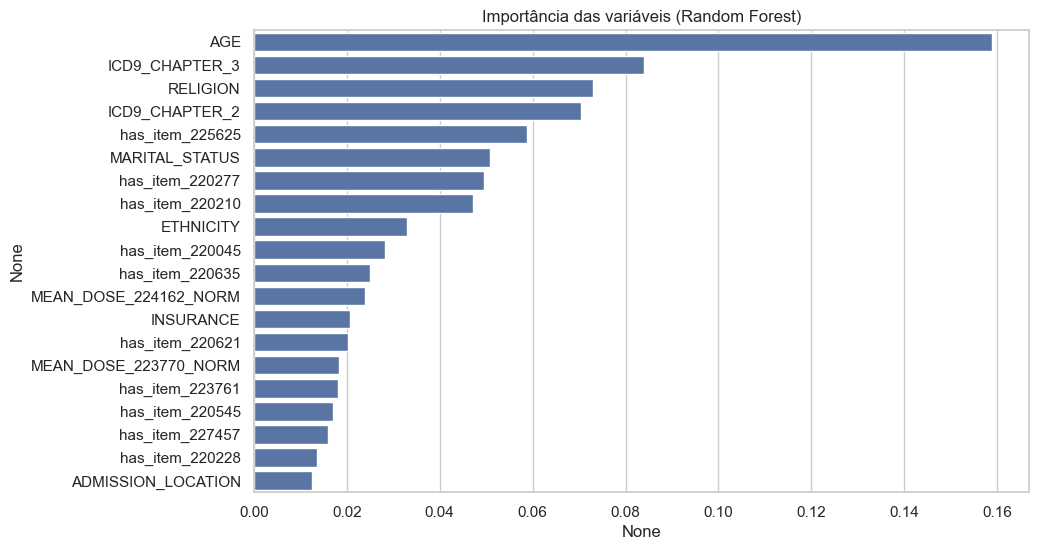

In [620]:
model = RandomForestRegressor().fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=importances[:20], y=importances.index[:20])
plt.title("Importância das variáveis (Random Forest)")
plt.show()

In [621]:
from sklearn.feature_selection import f_regression
import pandas as pd

f_vals, p_vals = f_regression(X_train, y_train)
anova_results = pd.Series(p_vals, index=X_train.columns)
selected_features = anova_results[anova_results < 0.05].index.tolist()
print(selected_features)

['has_item_220645', 'has_item_225624', 'has_item_227073', 'has_item_220615', 'has_item_220621', 'has_item_220602', 'has_item_220545', 'has_item_227442', 'has_item_227443', 'has_item_220546', 'has_item_220228', 'has_item_227457', 'has_item_220635', 'has_item_225677', 'has_item_225625', 'has_item_220277', 'has_item_226512', 'has_item_220210', 'has_item_220045', 'has_item_223770', 'has_item_223761', 'has_item_220047', 'has_item_223769', 'has_item_220046', 'has_item_220179', 'has_item_220180', 'has_item_220181', 'has_item_223751', 'has_item_223752', 'has_item_224161', 'has_item_224162', 'has_item_226253', 'has_item_223834', 'has_item_227467', 'has_item_227465', 'has_item_227466', 'has_item_225664', 'has_item_225668', 'has_item_223835', 'has_item_225643', 'has_item_225642', 'has_item_225640', 'has_item_225639', 'has_item_225641', 'has_item_220224', 'has_item_220235', 'has_item_224828', 'has_item_225698', 'has_item_223830', 'rare_item_count', 'MEAN_DOSE_220645_NORM', 'MEAN_DOSE_227073_NORM',

In [622]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'n_estimators': [50, 100],
}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Melhores parâmetros:", grid.best_params_)

# Filtrar os dados com as features selecionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Criar e treinar o modelo com os melhores parâmetros do GridSearch
best_params = grid.best_params_
rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train_selected, y_train)

# Fazer previsões
preds = rf_model.predict(X_test_selected)

# Avaliar o modelo
print("\nRandom Forest com features selecionadas e tuning:")
print(f"R² Score: {r2_score(y_test, preds):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, preds):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, preds)):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, preds):.4f}")

Melhores parâmetros: {'max_depth': 5, 'n_estimators': 50}

Random Forest com features selecionadas e tuning:
R² Score: 0.4767
Mean Squared Error (MSE): 5.9116
Root Mean Squared Error (RMSE): 2.4314
Mean Absolute Error (MAE): 1.4830
